In [1]:
# --- Load Agents --- #
from agents.agent_reinforce.agent import REINFORCEAgent
from agents.agent_deepqn.agent import DeepQAgent
from agents.agent_ddpg.agent import DDPG_Agent

# --- Load Environments --- #
from environment.grid import GridEnv

# --- Load Necessary --- #
from collections import deque
import numpy as np
from utilities.helper import flatten


# --- Load Training --- #
from experiments.experiment import Experiment

%load_ext autoreload
%autoreload 2


C:\Users\danie\anaconda3\envs\drlnd\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


# Generalized

In [ ]:
environments = [GridEnv(num_agent = 2, agents_start = [(1,1)], goals_start=[(7,7)]), GridEnv(num_agent = 2)]
wrapped_agents = [[DeepQAgent(env.state_space, env.action_space.n) for n in range(env.num_agent)] for env in environments]
# wrapped_agents = [[DeepQAgent(env.state_space, env.action_space.n, dddpqagent_config) for n in range(env.num_agent)] for env in environments]

# dddpqagent_config=[{}, ]
# print(environments)
# print(wrapped_agents)


In [ ]:
ddpg_experiments=[Experiment("Test Experiment", env, agents, max_t=100, num_episodes=300) for agents, env in zip(wrapped_agents, environments)]

# dqn_experiments=[Experiment("Test Experiment", env, agents, max_t=100, num_episodes=300) for agents, env in zip(wrapped_agents, environments)]

# reinforce_experiments=[Experiment("Reinforce Experiment", env, agents, max_t=100, num_episodes=300) for agents, env in zip(wrapped_agents, environments)]

# print(experiments)

In [ ]:
for experiment in ddpg_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history)

# Experiments with config files

In [2]:
from experiments.experiment_list import exp_config_ddpg, exp_config_ppo, exp_config_dqn 
from agents.agent_ddpg.config import DDPG_AgentConfig


In [3]:
ddpg_experiments = []
for i, config in enumerate(exp_config_ddpg):
    """
    order of config: num_agent, grid_size, agents_start, goals_start, prob_right_direction, actor_critic 
    init environment: num_agent = 2, grid_size = 8, prob_right_direction = 1, agents_start = [], goals_start=[], render_board = False
    init of ddpg: state_size, action_size, seed=1, config=DDPG_AgentConfig()
    """

    env = GridEnv(num_agent = config[0], grid_size = config[1], agents_start = [config[2] for _ in range(config[0])], goals_start= [config[3] for _ in range(config[0])], prob_right_direction = config[4], render_board = False)
    agent_config = DDPG_AgentConfig(ACTOR_H=config[5], CRITIC_H=config[5])
    agents = [DDPG_Agent(env.state_space, env.action_space.n, seed=1, config=agent_config) for _ in range(env.num_agent)]

    ddpg_experiments.append(Experiment(name="DDPG Exp {}".format(i), environment= env, agents=agents, max_t=1, num_episodes=1, goal = 0.))

print(len(ddpg_experiments))

1080


Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


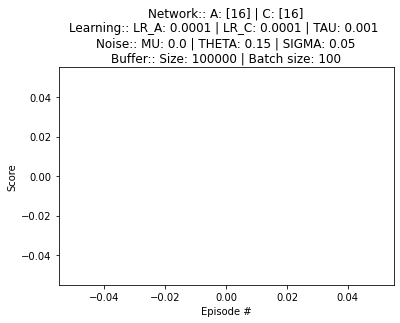

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


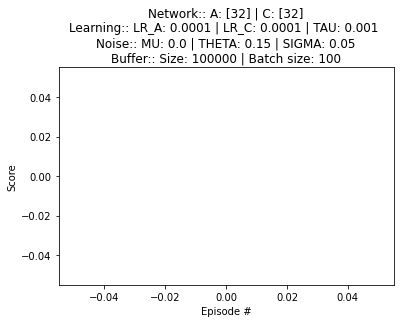

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


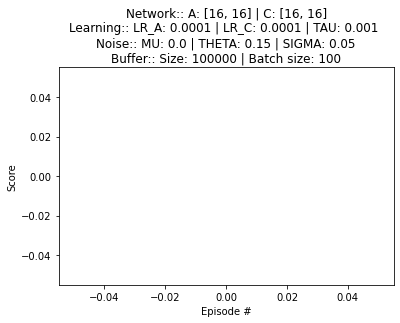

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


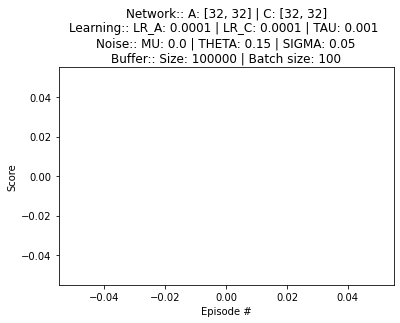

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


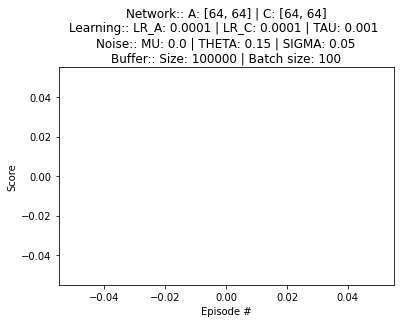

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


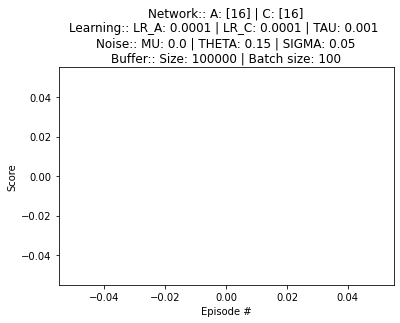

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


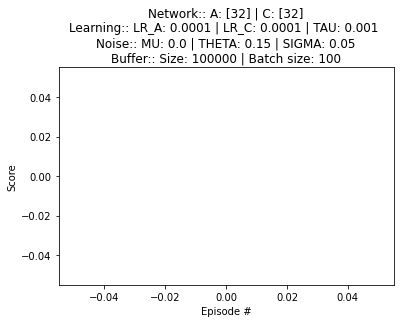

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


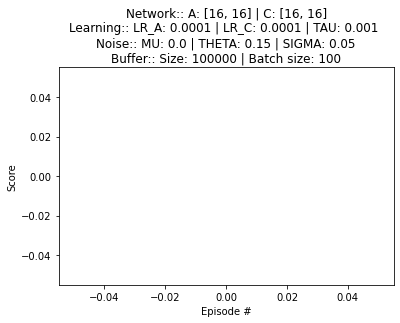

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


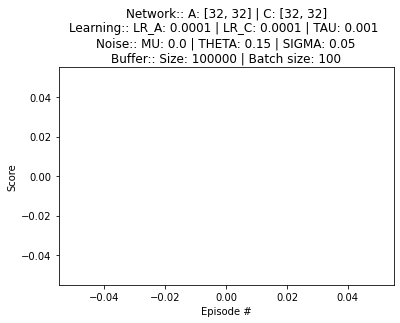

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


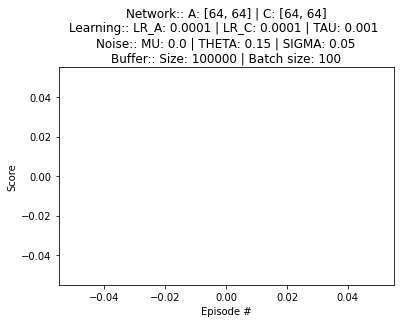

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


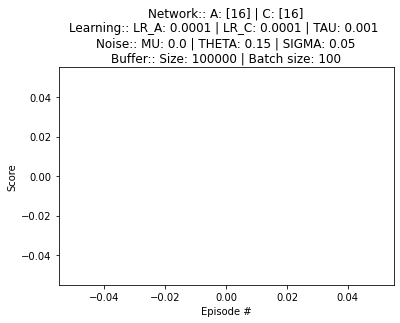

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


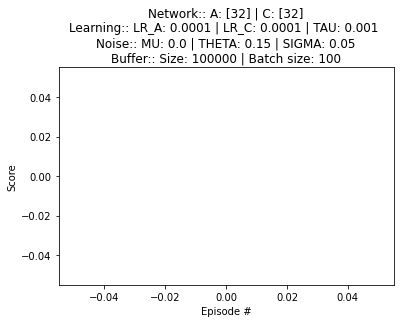

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


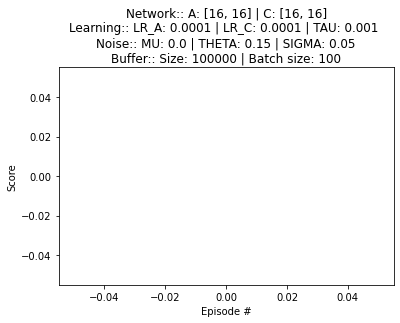

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


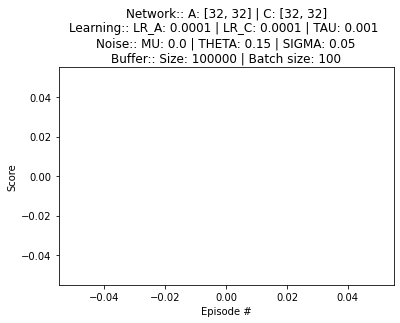

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


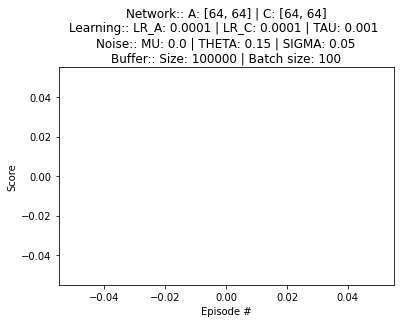

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


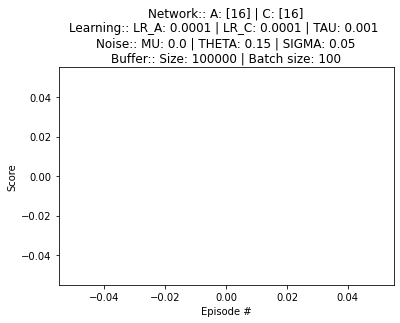

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


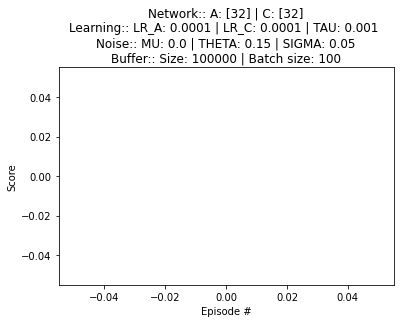

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


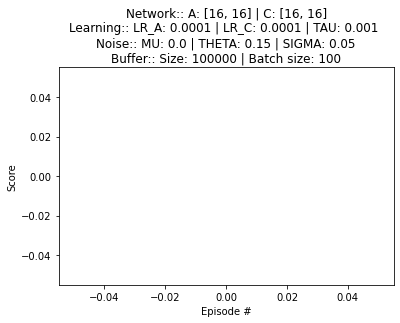

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


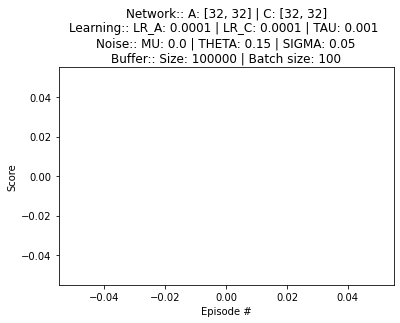

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


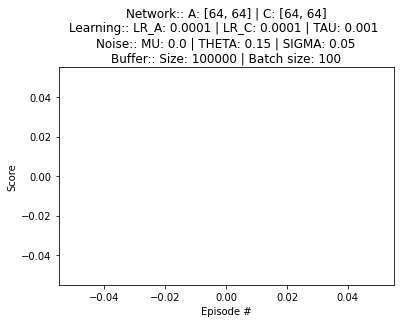

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


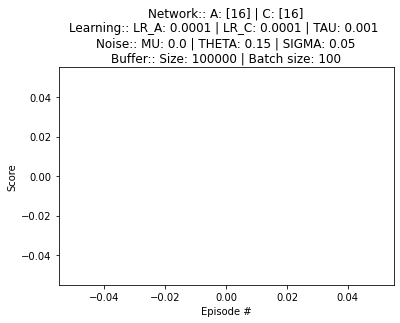

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


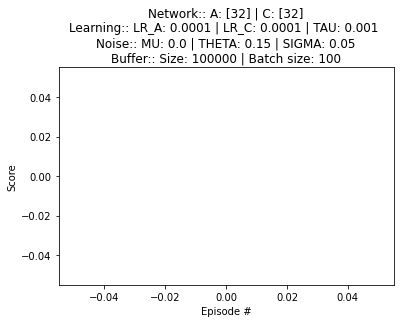

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


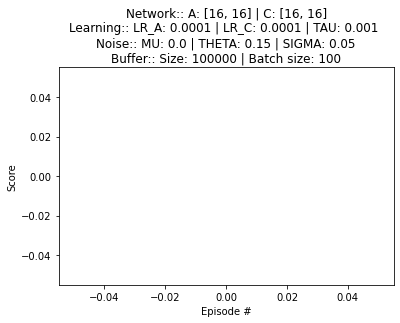

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


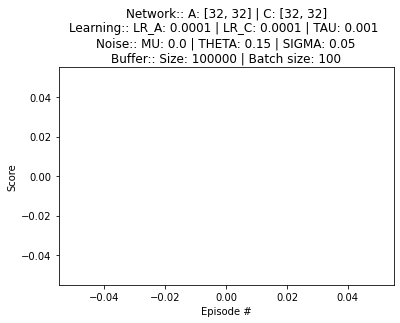

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


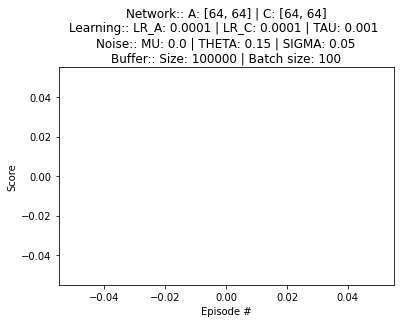

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


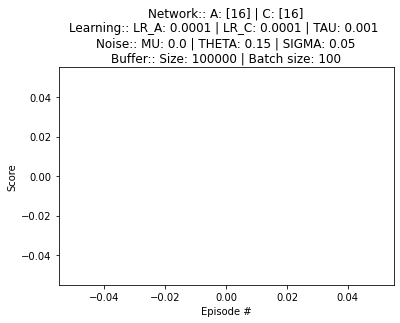

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


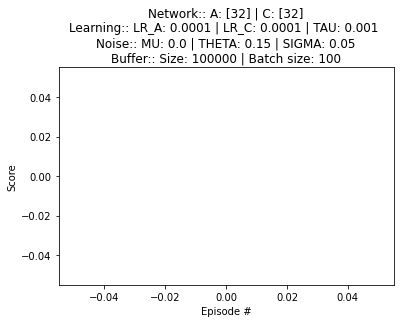

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


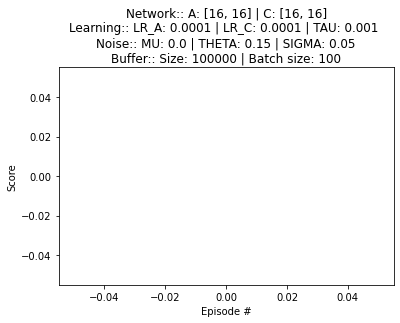

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


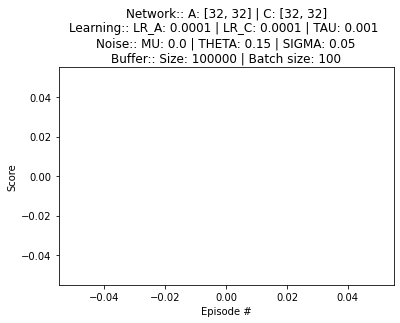

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


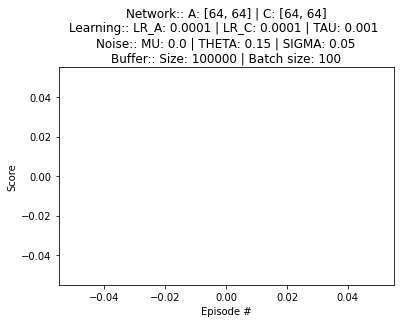

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


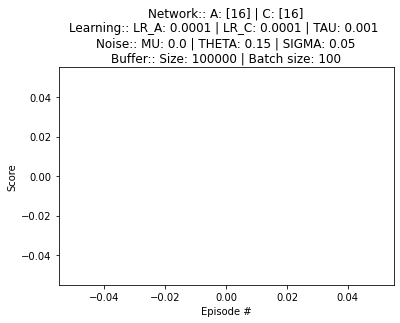

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


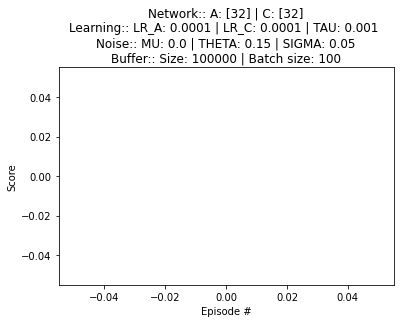

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


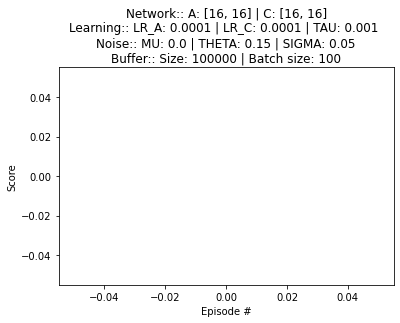

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


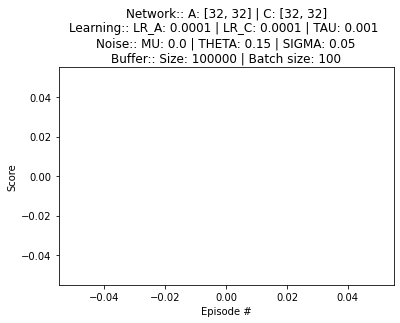

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


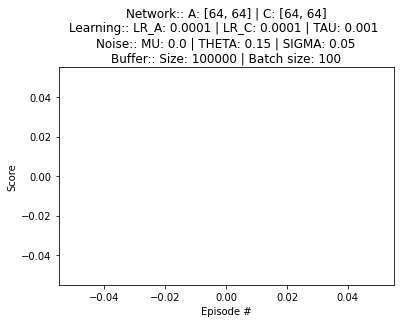

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


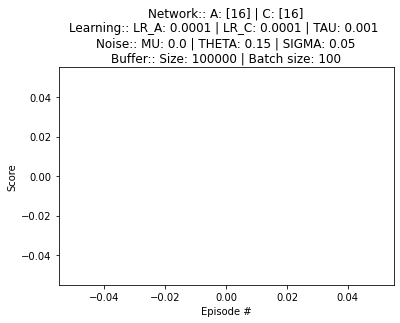

Running experiment
Encountered an error, going to log into file
Ran experiments
Scores saved!


KeyboardInterrupt: 

In [4]:
for experiment in ddpg_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)